In [ ]:
import sys
import pandas as pd
import os
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from pathlib import Path

sys.path.append(os.path.abspath(".."))

from utils import generate_csv,create_dataframe_from_xyz_files,create_X_y_from_dataframe



# Avec nombre d'atomes

In [2]:
csv_path = "../../data/energies/train.csv"
path_data = "../../data/atoms/train"

In [3]:
df_train=create_dataframe_from_xyz_files(path_data,csv_path)

In [4]:
X,y=create_X_y_from_dataframe(df_train,['num_atoms'])

In [5]:
# Régression linéaire
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Calcul de la RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Affichage des résultats
print(f"Coefficient (pente): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Score R²: {model.score(X, y)}")
print(f"RMSE: {rmse}")

Coefficient (pente): -4.008209173432938
Intercept: -10.954350976481251
Score R²: 0.9175160872380019
RMSE: 3.346571628789673


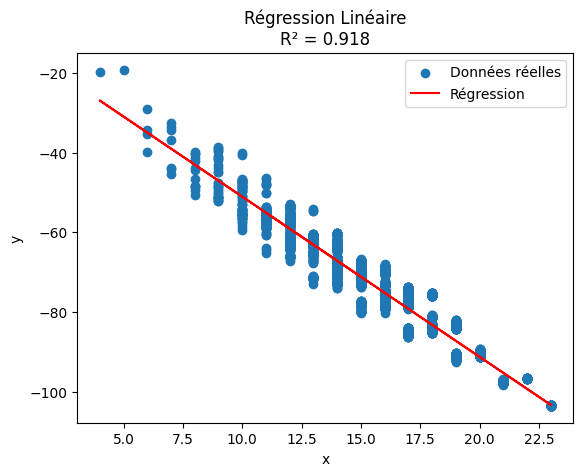

In [6]:
plt.scatter(df_train["num_atoms"], df_train["energy"], label="Données réelles")
plt.plot(df_train["num_atoms"], y_pred, color="red", label="Régression")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Régression Linéaire\nR² = {r2_score(y, y_pred):.3f}")
plt.legend()
plt.show()

In [7]:
path_test = "../../data/atoms/test"
df_test = create_dataframe_from_xyz_files(path_test,None)

In [8]:
X_test,_=create_X_y_from_dataframe(df_test,['num_atoms'],test=True)
y_pred_test = model.predict(X_test)

In [9]:
generate_csv(df_test['id'],y_pred_test,'nb_atoms_reg_lineaire')

# Avec masse et nombre d'atomes

In [10]:
X,y=create_X_y_from_dataframe(df_train)
# Régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Calcul de la RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Affichage des résultats
print(f"Coefficient (pente): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Score R²: {model.score(X, y)}")
print(f"RMSE: {rmse}")

Coefficient (pente): -3.4376746803846534
Intercept: 6.92963071985983
Score R²: 0.9368825645021057
RMSE: 2.927454611041058


In [12]:
X_test,_ = create_X_y_from_dataframe(df_test,test=True)
y_pred_test = model.predict(X_test)
generate_csv(df_test['id'],y_pred_test,'all_reg_lineaire')